# 🚀 Private Credit Default Prediction

<details>
<summary><strong>🔍 Recommendation System Overview</strong></summary>

A **recommendation system** finds patterns between users and products to suggest items users are likely to want.

</details>

<details>
<summary><strong>🎯 Benefits of Recommendation Systems</strong></summary>

- 🛍️ **Helps users discover relevant products**  
- 📈 **Increases user activity and engagement**  
- 🎯 **Delivers the right products to the right users**  
  - _e.g., 35% of Amazon sales come from recommendations_  
- 🎬 **Personalizes content based on preferences**  
  - _Most of Netflix's rented movies are recommended ones_  
- 📰 **Boosts visibility and interaction**  
  - _Google News saw a 40% increase in hits through recommendations_

</details>



## 🛠️ Data Preparation
Preparing the dataset by loading, exploring, and handling missing values.

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd

# Load the dataset
df = pd.read_csv('credit.csv') # A dataset with credit card transactions

print(df.shape)

(5918, 32)


In [2]:
df.head(10)

,Cust_No,Target,Nation,Birth_Place,Gender,Age,Marriage_State,Highest Education,House_State,Work_Years,...,ZX_Max_Overdue_Account,ZX_Link_Max_Overdue_Amount,ZX_Total_Overdu_Months,ZX_Max_Overdue_Duration,ZX_Max_Credits,ZX_Max_Credit_Banks,ZX_Max_Overdue_Credits,ZX_Credit_Max_Overdu_Amount,ZX_Credit_Total_Overdue_Months,ZX_Credit_Max_Overdue_Duration
0,2,0,1.0,330621,1,55,40.0,71.0,1.0,0,...,1,0,2,1,1,1,0,0,0,0
1,4,0,1.0,330621,0,40,99.0,90.0,1.0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,1.0,330621,1,45,20.0,71.0,1.0,0,...,1,23,3,1,2,2,0,0,0,0
3,7,0,NaN,330421,0,32,20.0,21.0,1.0,0,...,1,1,3,1,1,1,0,0,0,0
4,8,0,1.0,330621,0,46,20.0,71.0,NaN,0,...,0,0,0,0,0,0,0,0,0,0
5,9,0,1.0,330621,0,35,20.0,31.0,1.0,68624,...,0,0,0,0,20,2,0,0,0,0
6,10,0,1.0,330621,1,46,20.0,71.0,1.0,68624,...,2,519,3,1,1,1,0,0,0,0
7,11,1,1.0,330621,0,39,99.0,31.0,1.0,0,...,9,23698,9,2,11,4,3,10918,9,4
8,13,0,1.0,330621,1,54,20.0,61.0,2.0,68619,...,0,0,0,0,7,4,0,0,0,0
9,14,0,1.0,330621,1,45,20.0,71.0,1.0,68631,...,3,6379,33,1,1,1,2,4582,3,1


<Axes: >

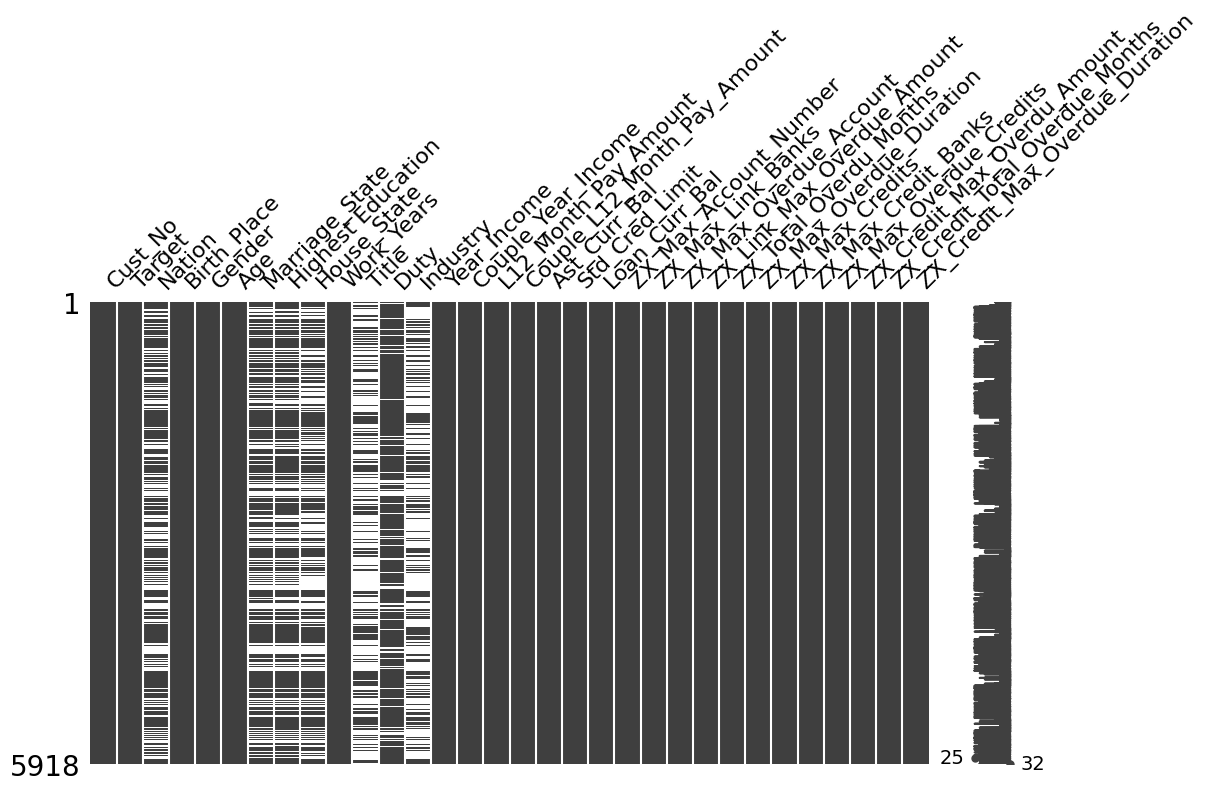

In [3]:
# View the missing values in the dataset using missingno
import missingno as msno
msno.matrix(df, figsize=(12, 6))


<Axes: >

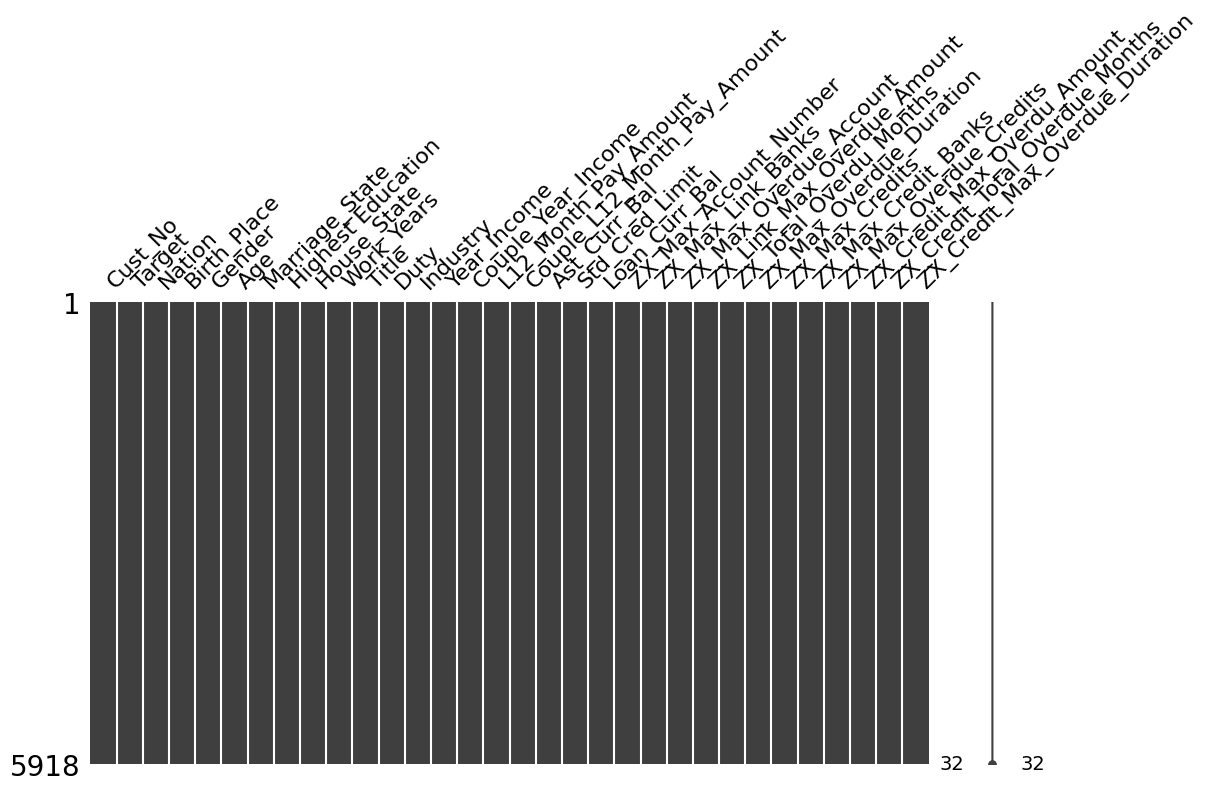

In [4]:
# Fill the missing values with the mean of each column
df.fillna(df.mean(), inplace=True)
# View the missing values again to confirm they have been filled
msno.matrix(df, figsize=(12, 6))

## 🔄 Data Splitting and Preprocessing
Splitting the dataset, scaling features, and balancing classes to prepare for modeling.

In [5]:
# Hide index in the DataFrame display
df.style.hide(axis="index")

# Remove the 'Target' column if it exists
df.drop(columns=['Target'], inplace=True, errors='ignore')

df.head(10)

,Cust_No,Nation,Birth_Place,Gender,Age,Marriage_State,Highest Education,House_State,Work_Years,Title,...,ZX_Max_Overdue_Account,ZX_Link_Max_Overdue_Amount,ZX_Total_Overdu_Months,ZX_Max_Overdue_Duration,ZX_Max_Credits,ZX_Max_Credit_Banks,ZX_Max_Overdue_Credits,ZX_Credit_Max_Overdu_Amount,ZX_Credit_Total_Overdue_Months,ZX_Credit_Max_Overdue_Duration
0,2,1.000000,330621,1,55,40.0,71.0,1.000000,0,9.000000,...,1,0,2,1,1,1,0,0,0,0
1,4,1.000000,330621,0,40,99.0,90.0,1.000000,0,6.618561,...,0,0,0,0,0,0,0,0,0,0
2,6,1.000000,330621,1,45,20.0,71.0,1.000000,0,6.618561,...,1,23,3,1,2,2,0,0,0,0
3,7,11.998686,330421,0,32,20.0,21.0,1.000000,0,6.618561,...,1,1,3,1,1,1,0,0,0,0
4,8,1.000000,330621,0,46,20.0,71.0,1.262926,0,6.618561,...,0,0,0,0,0,0,0,0,0,0
5,9,1.000000,330621,0,35,20.0,31.0,1.000000,68624,9.000000,...,0,0,0,0,20,2,0,0,0,0
6,10,1.000000,330621,1,46,20.0,71.0,1.000000,68624,9.000000,...,2,519,3,1,1,1,0,0,0,0
7,11,1.000000,330621,0,39,99.0,31.0,1.000000,0,9.000000,...,9,23698,9,2,11,4,3,10918,9,4
8,13,1.000000,330621,1,54,20.0,61.0,2.000000,68619,9.000000,...,0,0,0,0,7,4,0,0,0,0
9,14,1.000000,330621,1,45,20.0,71.0,1.000000,68631,9.000000,...,3,6379,33,1,1,1,2,4582,3,1


In [6]:
# Import necessary libraries for splitting the dataset
from sklearn.model_selection import train_test_split

#  Define 'default' column based on custom logic
# Example: customers with loan balance > 100,000 are labeled as default = 1
df['default'] = (df['Loan_Curr_Bal'] > 100000).astype(int)

# Split into features (X) and label (y)
X = df.drop(columns=['default'], errors='ignore')
y = df['default']

# Split the dataset into training and testing sets:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (5326, 31)
X_test shape: (592, 31)
y_train shape: (5326,)
y_test shape: (592,)


**Standardizing Data**
Scaling the features so the model can learn effectively.

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pd.DataFrame(X_train_scaled, columns=X_train.columns).head(5)

,Cust_No,Nation,Birth_Place,Gender,Age,Marriage_State,Highest Education,House_State,Work_Years,Title,...,ZX_Max_Overdue_Account,ZX_Link_Max_Overdue_Amount,ZX_Total_Overdu_Months,ZX_Max_Overdue_Duration,ZX_Max_Credits,ZX_Max_Credit_Banks,ZX_Max_Overdue_Credits,ZX_Credit_Max_Overdu_Amount,ZX_Credit_Total_Overdue_Months,ZX_Credit_Max_Overdue_Duration
0,1.513594,-0.469579,-0.158957,0.648572,-0.745576,-0.949813,-1.543755,-0.308150,-0.372184,0.993840,...,-0.535783,-0.133760,-0.270894,-0.547911,1.044528,1.916278,-0.208615,-0.074677,-0.097535,-0.212830
1,0.591484,-0.002539,-0.158957,0.648572,-0.962182,-0.002473,-0.000830,-0.000987,-0.372184,0.002763,...,-0.535783,-0.133760,-0.270894,-0.547911,0.051816,0.253099,1.420541,-0.074677,0.089932,1.463995
2,-0.322579,-0.469579,-0.461764,0.648572,-1.287092,-0.949813,-1.077258,2.028353,-0.372184,0.002763,...,0.822094,0.279262,0.059205,0.505962,0.051816,0.253099,-0.208615,-0.074677,-0.097535,-0.212830
3,0.357068,-0.469579,-0.155807,0.648572,-0.095757,-0.590310,0.322234,-0.308150,-0.372184,-2.751667,...,4.895725,0.293645,0.554353,0.505962,1.044528,1.084689,3.049697,-0.072906,0.277398,1.463995
4,-1.522019,-0.002539,-0.158957,0.648572,0.120850,-0.002473,-0.000830,-0.000987,-0.372184,0.002763,...,0.822094,-0.107369,0.306779,0.505962,0.051816,0.253099,1.420541,-0.057380,0.089932,1.463995


**Handling Class Imbalance**
Balancing the dataset to ensure fair predictions for both classes.

In [8]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_train_fix, y_train_fix = ros.fit_resample(X_train_scaled, y_train)

print("X_train_fix shape:", X_train_fix.shape)
print("y_train_fix shape:", y_train_fix.shape)
print("y_train_fix value counts:\n", Counter(y_train_fix))

X_train_fix shape: (8884, 31)
y_train_fix shape: (8884,)
y_train_fix value counts:
 Counter({0: 4442, 1: 4442})


## 🧠 Model Training and Optimization
Training the model and tuning its parameters to get the best results.

In [9]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = {
    'C': [0.01, 0.1, 1.0, 10],
    'solver': ['lbfgs', 'liblinear', 'saga']
}

lr = LogisticRegression(max_iter=500)
gs = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy')
gs.fit(X_train, y_train)

print("{:.16f}".format(gs.best_score_))
bp = gs.best_params_
print({'C': bp.get('C'), 'solver': bp.get('solver')})


0.9975590377788934
{'C': 0.01, 'solver': 'liblinear'}


## 📈 Model Evaluation
Evaluating how well the trained model predicts defaults.

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

best_model = LogisticRegression(C=bp['C'], solver=bp['solver'], max_iter=500)
best_model.fit(X_train_fix, y_train_fix)

def evaluate_and_print(model, X, y):
    y_pred = model.predict(X)
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    roc_auc = roc_auc_score(y, model.predict_proba(X)[:, 1])
    
    print(f"accuracy score is:{accuracy}")
    print(f"precision score is:{precision}")
    print(f"recall score is:{recall}")
    print(f"roc_auc score is:{roc_auc}")

evaluate_and_print(best_model, X_train_fix, y_train_fix)
evaluate_and_print(best_model, X_test_scaled, y_test)


accuracy score is:0.9056731202161189
precision score is:0.9104783599088838
recall score is:0.89981990094552
roc_auc score is:0.9671621789552917
accuracy score is:0.9290540540540541
precision score is:0.7681159420289855
recall score is:0.9137931034482759
roc_auc score is:0.9762387713706173


## 💾 Saving the Model
Saving the trained model so it can be used for future predictions.

In [11]:
import joblib

joblib.dump(best_model, 'credit_default_model.pkl')
loaded_model = joblib.load('credit_default_model.pkl')

sample_data = X_test_scaled[:5]
predictions = loaded_model.predict(sample_data)
print("Predictions for sample data:", predictions)

Predictions for sample data: [1 0 0 0 1]
